## Linear Regression with PyTorch

- x : independent variable
- y : depdent variable

$$ y = \alpha x + \beta $$

In [1]:
# simple example
import datetime
import sys

import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)
n = 50
x = np.random.randn(n)
y = x * np.random.randn(n)

colors = np.random.rand(n)
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))

plt.scatter(x, y, c=colors, alpha=.5)
plt.show()

<Figure size 640x480 with 1 Axes>

### aim: minimize the distance between the points and the line

- adjusting (coefficient : $\alpha$) or (bias : $\beta$)

- coefficient = 2
- bias = 1
- equation $y = 2x+ 1$

In [2]:
x_values = [i for i in range(11)]
x_values

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [3]:
# to numpy
x_train = np.array(x_values, dtype=np.float32)
x_train.shape

(11,)

In [4]:
# 2D shape
x_train = x_train.reshape(-1, 1)
x_train.shape

(11, 1)

In [5]:
x_train

array([[ 0.],
       [ 1.],
       [ 2.],
       [ 3.],
       [ 4.],
       [ 5.],
       [ 6.],
       [ 7.],
       [ 8.],
       [ 9.],
       [10.]], dtype=float32)

In [6]:
y_values = [2 * i + 1 for i in x_values]
y_values

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]

In [7]:
y_train = np.array(y_values, dtype=np.float32)
y_train.shape

(11,)

In [8]:
y_train = y_train.reshape(-1, 1)
y_train

array([[ 1.],
       [ 3.],
       [ 5.],
       [ 7.],
       [ 9.],
       [11.],
       [13.],
       [15.],
       [17.],
       [19.],
       [21.]], dtype=float32)

## model building

In [9]:
import torch.nn as nn
from torch.autograd import Variable
import torch

In [10]:
# linear model y=2x + 1

In [11]:
class LinearRegressionModel(nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)
        
    def forward(self, x):
        out = self.linear(x)
        return out

In [12]:
input_dim = 1
output_dim = 1

model = LinearRegressionModel(input_dim, output_dim)

## instantiate loss
- MSE loss (Mean Squared Error)
- $MSE = \frac{1}{n} \sum_{i=1}^n(\hat y_i - y_i)$
    - $\hat y$: prediction
    - $y$: true value

In [13]:
criterion = nn.MSELoss()

## Optimizer
- Simplified equation
    - $\theta = \theta - \eta \cdot \nabla_\theta $
        - $\theta$: parameters (our variables)
        - $\eta$: learning rate (how fast we want to learn)
        - $\nabla_\theta$: parameters' gradients
- Even simplier equation
    - `parameters = parameters - learning_rate * parameters_gradients`
        - parameters: $\alpha$ and $\beta$ in $ y = \alpha x + \beta$
        - desired parameters: $\alpha = 2$ and $\beta = 1$ in $ y = 2x + 1$

In [14]:
learning_rate = 0.01

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

## train

- 1 epoch = going through the whole x_train data once


1. convert inputs/labels to variables
2. clear gradient buffets
3. get output
4. get loss
5. get gradients w.r.t parameters
6. update parameters with gradients
7. repeat

In [15]:
epochs = 100
start_time = datetime.datetime.now()

for e in range(epochs):
    e += 1
    
    # convert inputs/labels to variables
    inputs = Variable(torch.from_numpy(x_train))
    labels = Variable(torch.from_numpy(y_train))
    
    # clear gradients
    optimizer.zero_grad()
    
    # forward & get output
    outputs = model(inputs)
    
    # calculate loss
    loss = criterion(outputs, labels)
    
    # gradients
    loss.backward()
    
    # update parameters
    optimizer.step()
    
    print('epoch {}, loss {}'.format(e, loss.data.item()))
sys.stdout.write('Time '+ str(datetime.datetime.now() - start_time))

epoch 1, loss 260.6395263671875
epoch 2, loss 21.328079223632812
epoch 3, loss 1.8074325323104858
epoch 4, loss 0.21443681418895721
epoch 5, loss 0.083753302693367
epoch 6, loss 0.07235391438007355
epoch 7, loss 0.07069242745637894
epoch 8, loss 0.06983327865600586
epoch 9, loss 0.06904792040586472
epoch 10, loss 0.06827633827924728
epoch 11, loss 0.06751392781734467
epoch 12, loss 0.06675992906093597
epoch 13, loss 0.06601448357105255
epoch 14, loss 0.06527730077505112
epoch 15, loss 0.06454837322235107
epoch 16, loss 0.06382744014263153
epoch 17, loss 0.06311486661434174
epoch 18, loss 0.06240992620587349
epoch 19, loss 0.06171305105090141
epoch 20, loss 0.06102386862039566
epoch 21, loss 0.06034243479371071
epoch 22, loss 0.05966861918568611
epoch 23, loss 0.05900230258703232
epoch 24, loss 0.058343470096588135
epoch 25, loss 0.057692043483257294
epoch 26, loss 0.057047802954912186
epoch 27, loss 0.05641062930226326
epoch 28, loss 0.055780790746212006
epoch 29, loss 0.05515776202082

In [16]:
predicted = model(Variable(torch.from_numpy(x_train))).data.numpy()
predicted

array([[ 0.7067548],
       [ 2.7489848],
       [ 4.791215 ],
       [ 6.833445 ],
       [ 8.875675 ],
       [10.917906 ],
       [12.960135 ],
       [15.002365 ],
       [17.044596 ],
       [19.086826 ],
       [21.129057 ]], dtype=float32)

In [17]:
y_train

array([[ 1.],
       [ 3.],
       [ 5.],
       [ 7.],
       [ 9.],
       [11.],
       [13.],
       [15.],
       [17.],
       [19.],
       [21.]], dtype=float32)

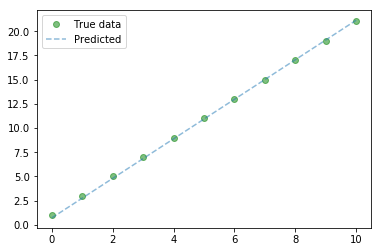

In [18]:
# plot
plt.clf() #clear figure

plt.plot(x_train, y_train, 'go', label='True data', alpha=.5)
plt.plot(x_train, predicted, '--', label='Predicted', alpha=.5)

plt.legend(loc='best')
plt.show()

## save

In [19]:
torch.save(model.state_dict(), 'regression_model.pkl')

In [20]:
t_model = LinearRegressionModel(1, 1)
t_model.load_state_dict(torch.load('regression_model.pkl'))

IncompatibleKeys(missing_keys=[], unexpected_keys=[])

In [21]:
t_model(Variable(torch.from_numpy(x_train)))

tensor([[ 0.7068],
        [ 2.7490],
        [ 4.7912],
        [ 6.8334],
        [ 8.8757],
        [10.9179],
        [12.9601],
        [15.0024],
        [17.0446],
        [19.0868],
        [21.1291]], grad_fn=<AddmmBackward>)

## GPU

In [22]:
if torch.cuda.is_available():
    model.cuda()

start_time = datetime.datetime.now()
epochs = 100

for e in range(epochs):
    e += 1
    
    # convert inputs/labels to variables
    if torch.cuda.is_available():
        inputs = Variable(torch.from_numpy(x_train).cuda())
        labels = Variable(torch.from_numpy(y_train).cuda())
    else:
        inputs = Variable(torch.from_numpy(x_train))
        labels = Variable(torch.from_numpy(y_train))
    
    # clear gradients
    optimizer.zero_grad()
    
    # forward & get output
    outputs = model(inputs)
    
    # calculate loss
    loss = criterion(outputs, labels)
    
    # gradients
    loss.backward()
    
    # update parameters
    optimizer.step()
    
    print('epoch {}, loss {}'.format(e, loss.data.item()))
    
sys.stdout.write('Time '+ str(datetime.datetime.now() - start_time))

epoch 1, loss 146.0475311279297
epoch 2, loss 74.51280975341797
epoch 3, loss 6.099574565887451
epoch 4, loss 0.5190826058387756
epoch 5, loss 0.06365825980901718
epoch 6, loss 0.026272492483258247
epoch 7, loss 0.022987686097621918
epoch 8, loss 0.022486984729766846
epoch 9, loss 0.02221600152552128
epoch 10, loss 0.0219662357121706
epoch 11, loss 0.021720750257372856
epoch 12, loss 0.021478276699781418
epoch 13, loss 0.02123843878507614
epoch 14, loss 0.02100123092532158
epoch 15, loss 0.020766714587807655
epoch 16, loss 0.020534764975309372
epoch 17, loss 0.020305486395955086
epoch 18, loss 0.020078780129551888
epoch 19, loss 0.019854538142681122
epoch 20, loss 0.019632818177342415
epoch 21, loss 0.019413597881793976
epoch 22, loss 0.01919674500823021
epoch 23, loss 0.018982423469424248
epoch 24, loss 0.018770460039377213
epoch 25, loss 0.018560828641057014
epoch 26, loss 0.018353551626205444
epoch 27, loss 0.018148647621273994
epoch 28, loss 0.01794600673019886
epoch 29, loss 0.017